In [15]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_excel('Input/q2.xlsx')
df

,Email_Length,Has_Offer,Contains_Links,Is_Spam
0,Short,Yes,Yes,Yes
1,Long,No,No,No
2,Medium,Yes,Yes,Yes
3,Short,No,No,No
4,Long,Yes,Yes,Yes
5,Medium,No,No,No
6,Short,Yes,No,Yes
7,Medium,Yes,No,No
8,Long,Yes,No,No
9,Short,No,Yes,Yes


In [5]:
# Manual Method of replacement
for i in range(len(df['Has_Offer'])):
    df.loc[i,'Has_Offer'] = 1 if df['Has_Offer'][i]=='Yes' else 0
df

,Email_Length,Has_Offer,Contains_Links,Is_Spam
0,Short,1,Yes,Yes
1,Long,0,No,No
2,Medium,1,Yes,Yes
3,Short,0,No,No
4,Long,1,Yes,Yes
5,Medium,0,No,No
6,Short,1,No,Yes
7,Medium,1,No,No
8,Long,1,No,No
9,Short,0,Yes,Yes


In [6]:
# Using the replace function
df['Contains_Links'] = df['Contains_Links'].replace(['Yes','No'],[1,0])
df['Is_Spam'] = df['Is_Spam'].replace(['Yes','No'],[1,0])
df['Email_Length'] = df['Email_Length'].replace(['Short','Medium','Long'],[0,1,2])

C:\Users\param\AppData\Local\Temp\ipykernel_11616\3227507540.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Contains_Links'] = df['Contains_Links'].replace(['Yes','No'],[1,0])
C:\Users\param\AppData\Local\Temp\ipykernel_11616\3227507540.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Is_Spam'] = df['Is_Spam'].replace(['Yes','No'],[1,0])
C:\Users\param\AppData\Local\Temp\ipykernel_11616\3227507540.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain

In [7]:
df

,Email_Length,Has_Offer,Contains_Links,Is_Spam
0,0,1,1,1
1,2,0,0,0
2,1,1,1,1
3,0,0,0,0
4,2,1,1,1
5,1,0,0,0
6,0,1,0,1
7,1,1,0,0
8,2,1,0,0
9,0,0,1,1


In [8]:
x = df.dropna().drop('Is_Spam',axis=1)
y = df['Is_Spam']

In [9]:
x_train , x_test, y_train, y_test = train_test_split(x,y)

In [10]:
x_train.shape[0] == len(y_train)

True

In [11]:
model = GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [12]:
y_pred = model.predict(x_test)

In [13]:
accuracy_score(y_test,y_pred)

0.6666666666666666

In [ ]:
x = np.array(x)
y = np.array(y)

In [24]:
print(x,y)

[[0 1 1]
 [2 0 0]
 [1 1 1]
 [0 0 0]
 [2 1 1]
 [1 0 0]
 [0 1 0]
 [1 1 0]
 [2 1 0]
 [0 0 1]] [1 0 1 0 1 0 1 0 0 1]


In [ ]:
x_min,x_max = x[:,0].min()-1 , x[:,0].max()+1
y_min,y_max = x[:,1].min()-1 , x[:,1].max()+1

xx , yy , zz = np.meshgrid(np.arange(x_min,x_max,0.01),np.arange(y_min,y_max,0.01),np.arange(x_min,x_max,0.01))
z = model.predict(np.c_[xx.ravel(),yy.ravel(),zz.ravel()])
z = z.reshape(xx.shape)

c:\Users\param\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


TypeError: Input z must be 2D, not 3D

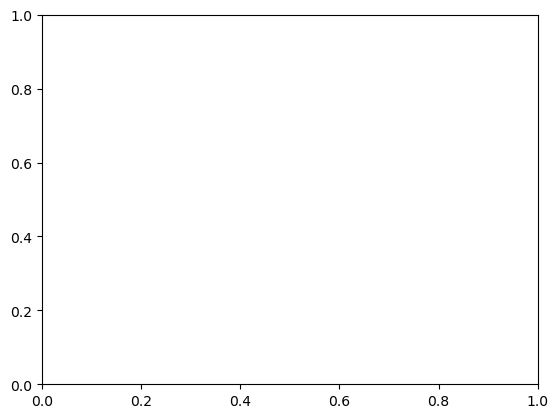

In [ ]:
plt.contourf(xx, yy, z , cmap = plt.cm.RdBu, alpha = 0.8)
plt.scatter(x[:,0],x[:,1],c=y,cmap='viridis')
